# Final Project

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [3]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
data = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bad-drivers/bad-drivers.csv')
head(data)
colnames(data) = c('state', 'fatal', 'speeding', 'alcohol', 'notdistracted', 'nopreviousaccidents', 'insurancepremiums', 'losses')
head(data)


── Column specification ────────────────────────────────────────────────────────
cols(
  State = col_character(),
  `Number of drivers involved in fatal collisions per billion miles` = col_double(),
  `Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding` = col_double(),
  `Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired` = col_double(),
  `Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted` = col_double(),
  `Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents` = col_double(),
  `Car Insurance Premiums ($)` = col_double(),
  `Losses incurred by insurance companies for collisions per insured driver ($)` = col_double()
)




State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,18.8,39,30,96,80,784.55,145.08
Alaska,18.1,41,25,90,94,1053.48,133.93
Arizona,18.6,35,28,84,96,899.47,110.35
Arkansas,22.4,18,26,94,95,827.34,142.39
California,12.0,35,28,91,89,878.41,165.63
Colorado,13.6,37,28,79,95,835.50,139.91


state,fatal,speeding,alcohol,notdistracted,nopreviousaccidents,insurancepremiums,losses
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,18.8,39,30,96,80,784.55,145.08
Alaska,18.1,41,25,90,94,1053.48,133.93
Arizona,18.6,35,28,84,96,899.47,110.35
Arkansas,22.4,18,26,94,95,827.34,142.39
California,12.0,35,28,91,89,878.41,165.63
Colorado,13.6,37,28,79,95,835.50,139.91


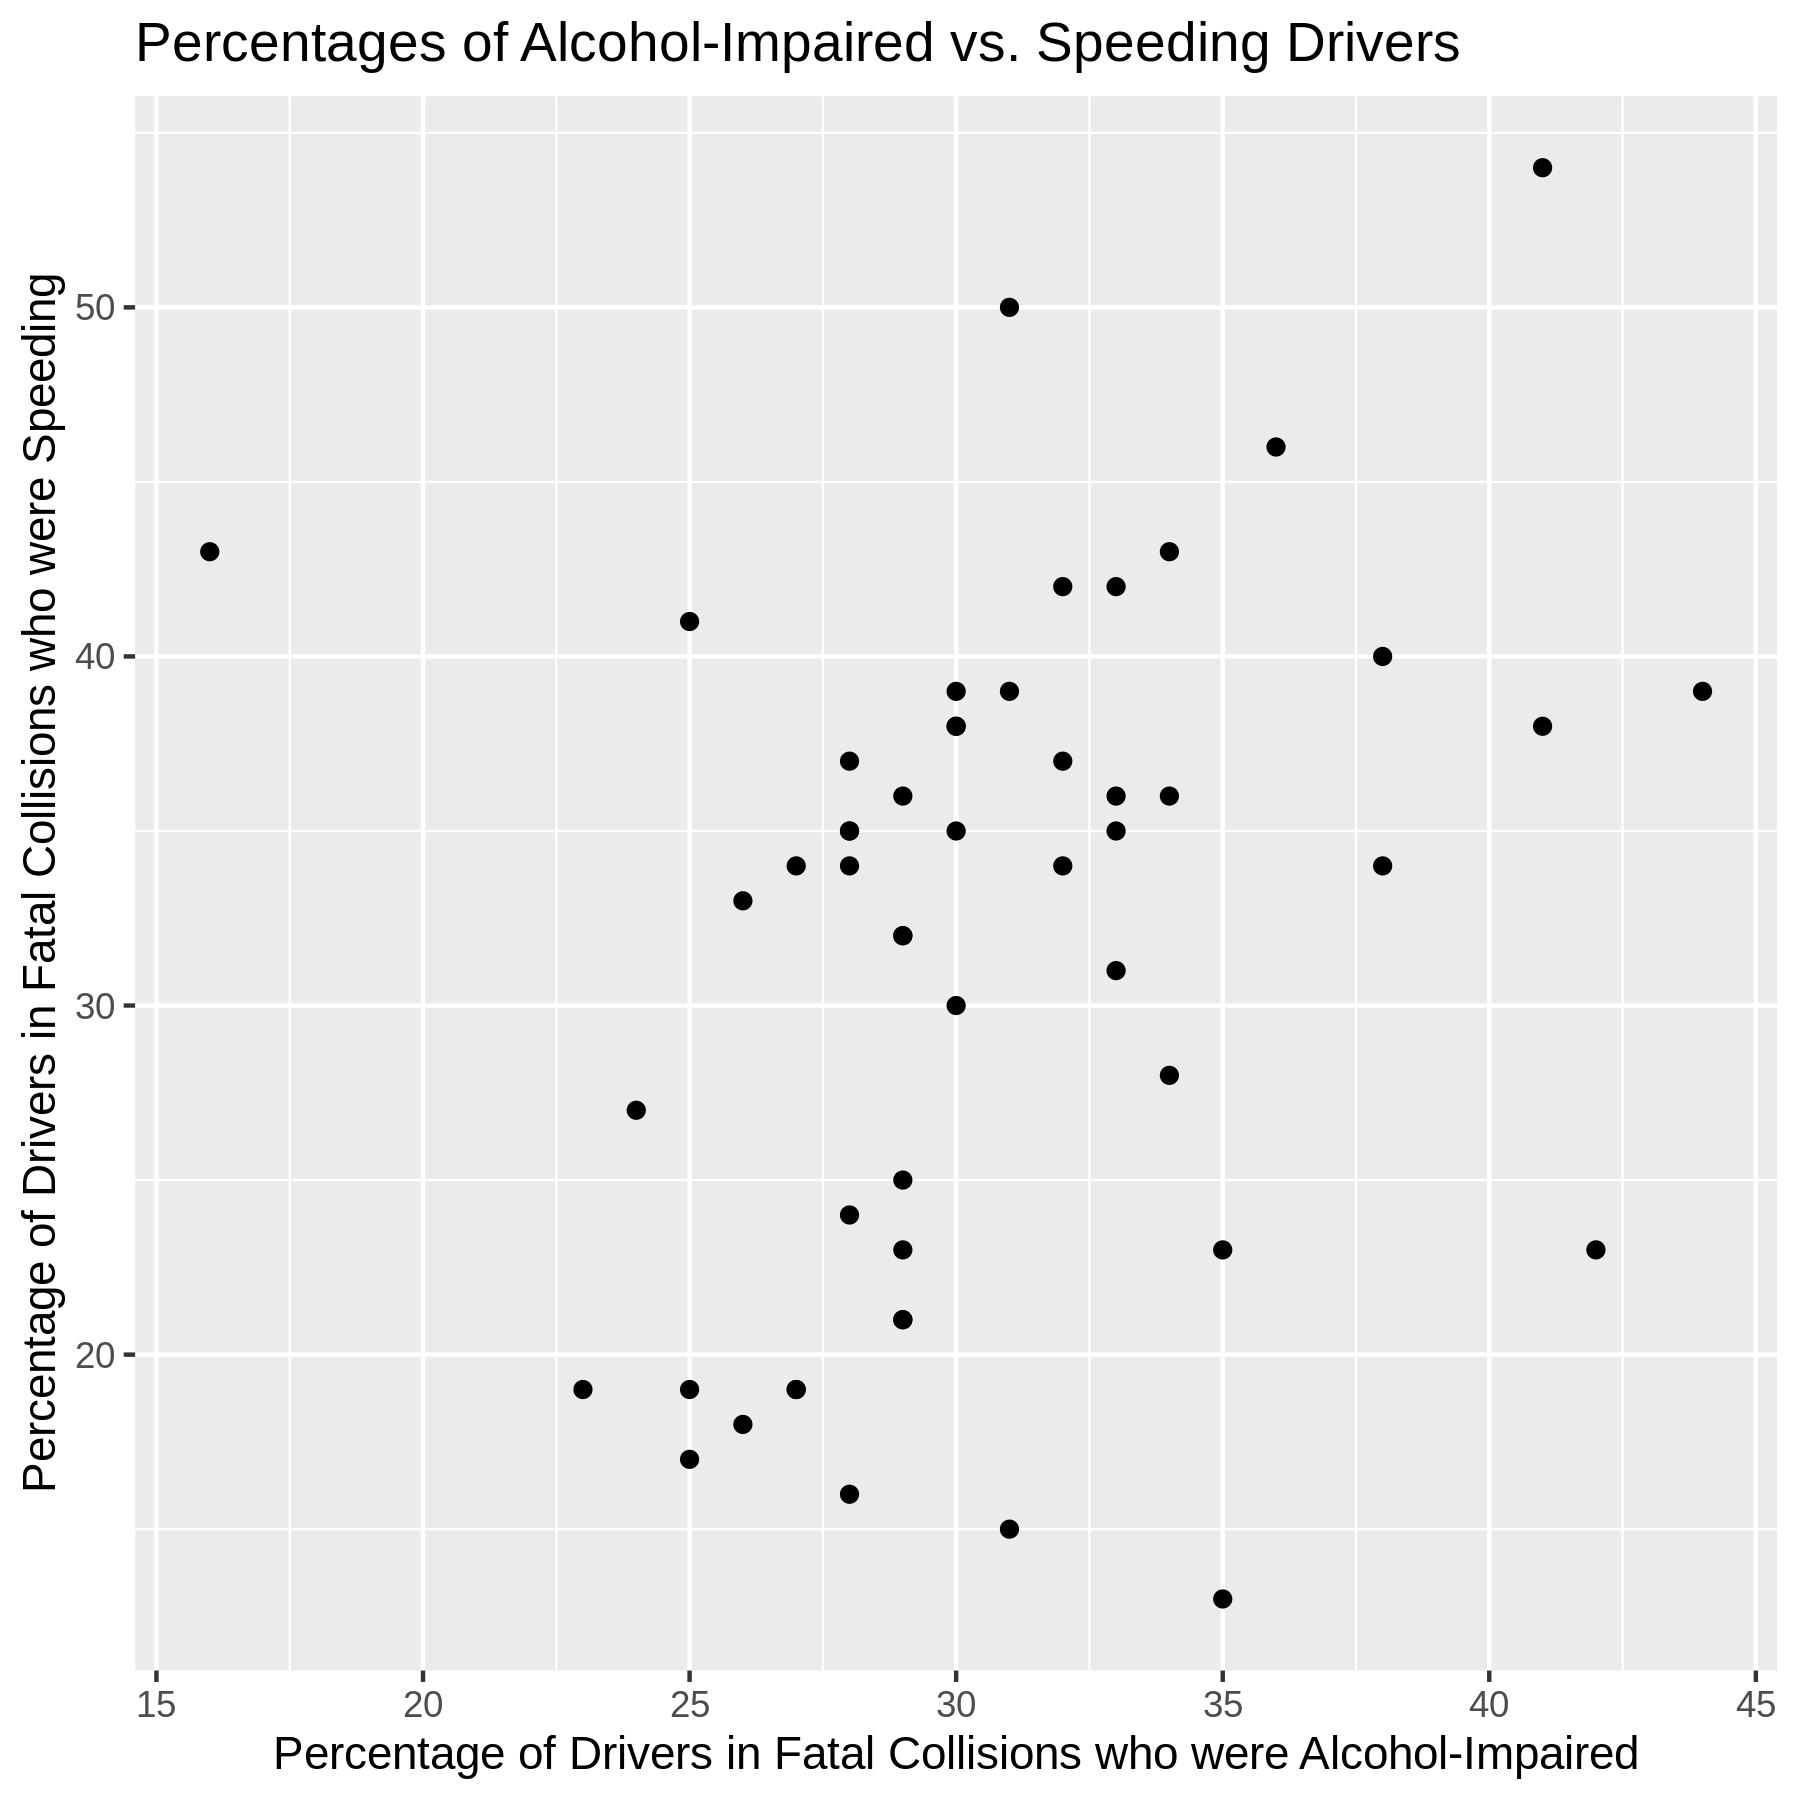

In [5]:
options(repr.plot.width=6, repr.plot.height=6)
p = ggplot(data, aes(y = speeding, x = alcohol))
p = p + geom_point(na.rm = TRUE)
p = p + labs(title= 'Percentages of Alcohol-Impaired vs. Speeding Drivers', 
             x= 'Percentage of Drivers in Fatal Collisions who were Alcohol-Impaired',y= 'Percentage of Drivers in Fatal Collisions who were Speeding')
p

My first graph (seen above) was a scatterplot showing the relationship between the percentage of drivers in fatal collisions who were alcohol-impaired and the percentage of drivers in fatal accidents who were speeding. I created this scatterplot because I suscpected that these two variables would be positively correlated. My inference was correct; on average, the percentage of drivers who were speeding seems to be higher as the percentage of alcohol-impaired drivers is also higher (and vice versa). This makes logical sense, as those who are willing to drive while under the influence of alcohol, a very risky driving behavior, are more likely to engage in other risky behaviors, such as speeding.

Selecting by losses



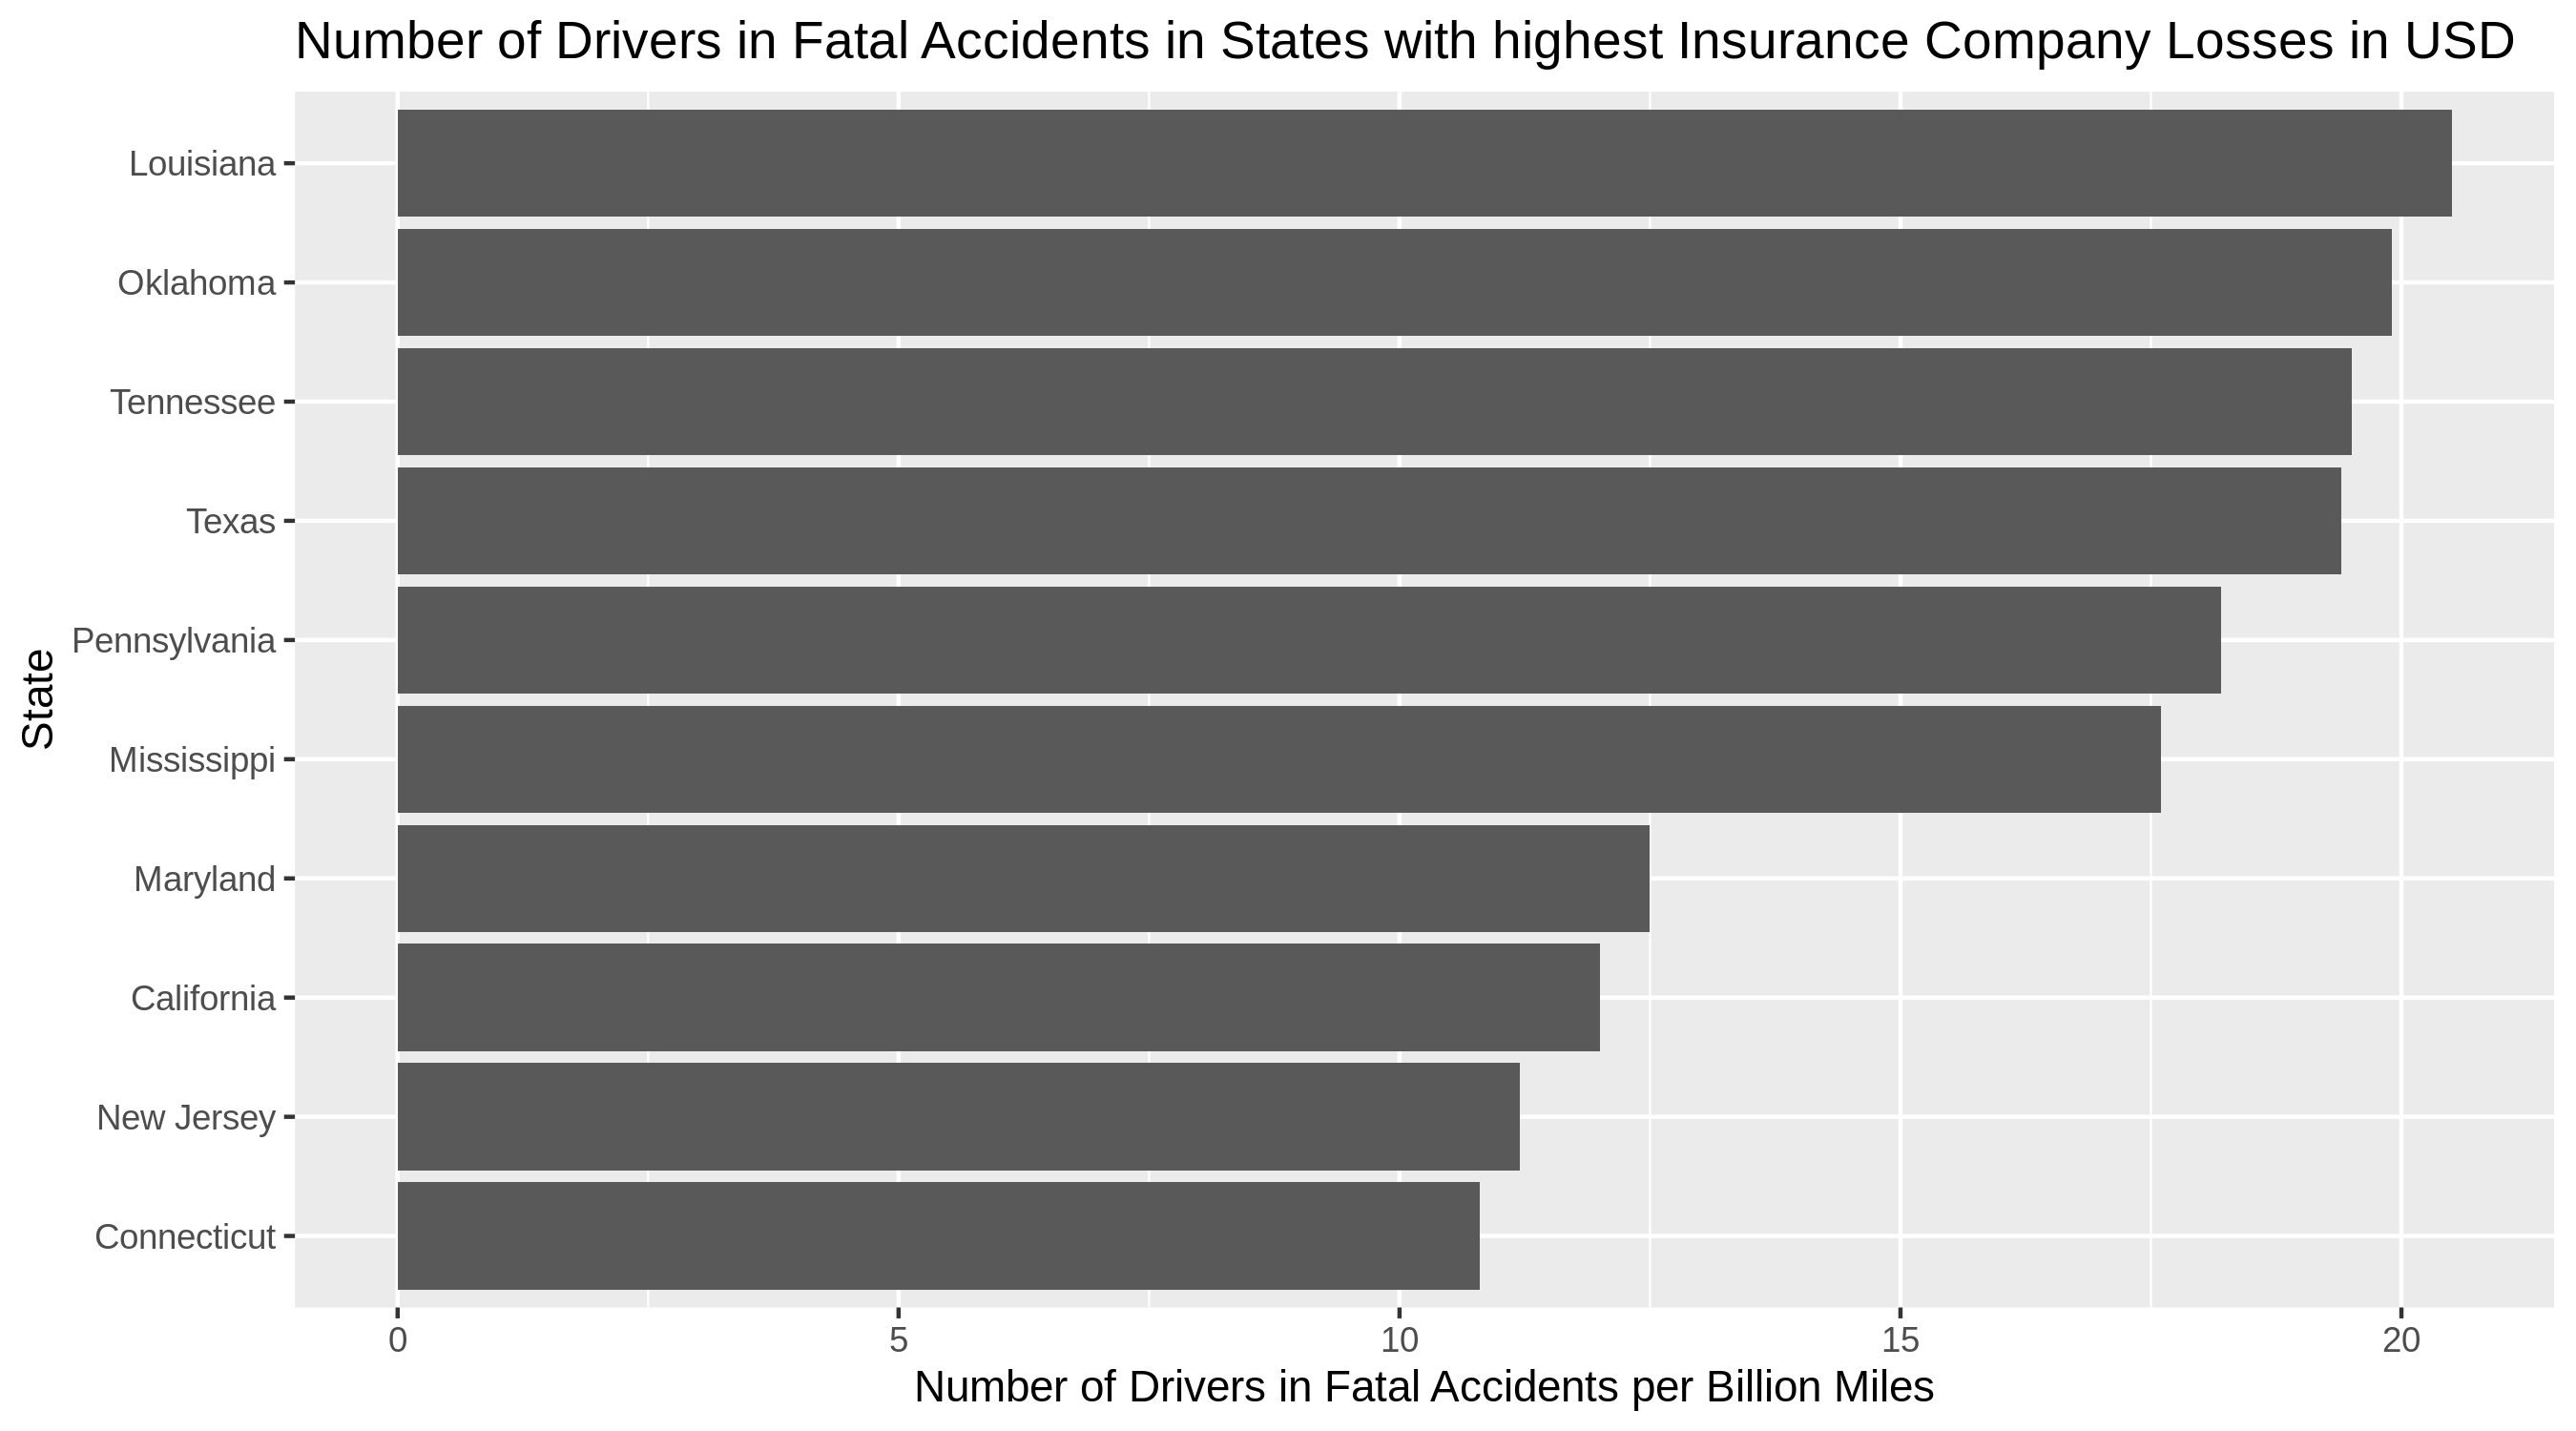

In [6]:
options(repr.plot.width=9, repr.plot.height=5)
data_top = data %>% top_n(10)

p = ggplot(data_top, aes(x=reorder(state, fatal), y=fatal))
p = p + geom_bar(stat = "identity") + coord_flip()
p = p + labs(title = "Number of Drivers in Fatal Accidents in States with highest Insurance Company Losses in USD", y="Number of Drivers in Fatal Accidents per Billion Miles", x="State")
p

My second graph (seen above) was a bar chart showing the number of drivers in fatal accidents per billion miles among the 10 states that had the highest losses incurred by insurance companies for collisions per insured driver in USD. I created this bar chart because I suscpected that states with higher losses in USD per insured driver would have higher numbers of drivers involved in fatal accidents. My inference was correct for the 10 states with the highest losses; the number of drivers who were in fatal accidents per billion miles decreases as the state's losses also decrease. This again makes sense that these two variables are positively correlated; logically, there will be more insurance losses as more accidents happen (and vice versa).

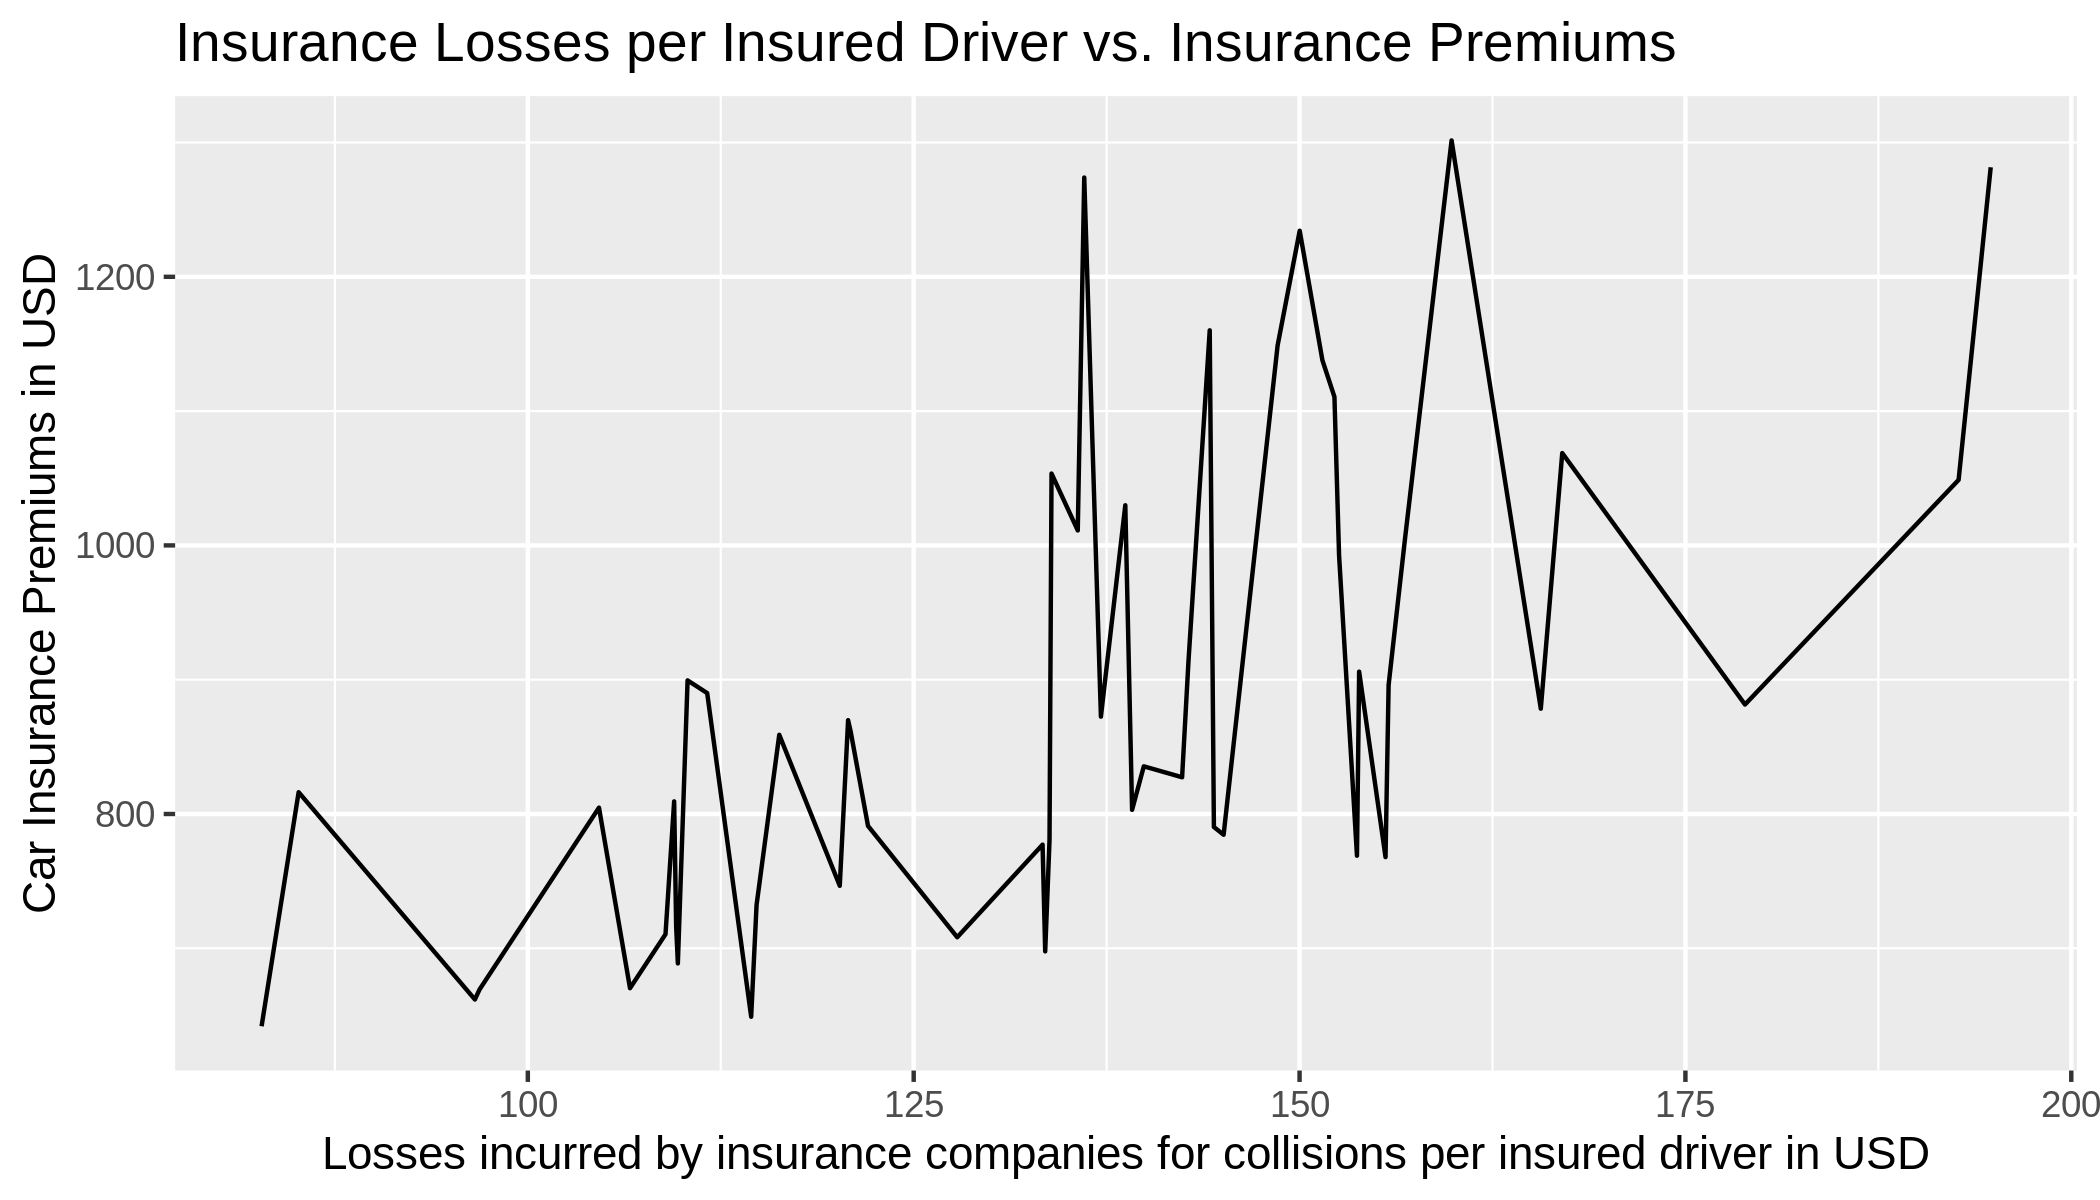

In [31]:
p = ggplot(data = data, aes(x=losses, y=insurancepremiums))
p = p + geom_line(na.rm = TRUE)
p = p + labs(title= 'Insurance Losses per Insured Driver vs. Insurance Premiums', 
             x= 'Losses incurred by insurance companies for collisions per insured driver in USD',y= 'Car Insurance Premiums in USD')
p

My third graph (seen above) was a line chart showing the losses incurred by insurance companies for collisions per insured driver in USD and car insurance premiums in USD. I created this line chart because I suscpected that states with higher losses in USD per insured driver would also have higher insurance premiums. While the data was somewhat scattered, I still believe that this graph shows evidence of an overall positive correlation. Considering all three of my charts, I think it is important to once again recongize how dangerous driving can be. There are many people out there who are unfortuntely willing to put themselves those around them at risk. These people need to realize how certain risky behaviors can seriously affect their chances of getting into a fatal car accident. It is important to remember to always be alart while driving; even if you are not under the influence or speeding, there are still many people out there who could be.